# Л.Р. #1 — Градиентный спуск и его модификации



*   Выбрать тестовые функции оптимизации (2 шт)
*   Запрограммировать собственную реализацию классического градиентного спуска
*   Запрограммировать пайплайн тестирования алгоритма оптимизации
  *   Визуализации функции и точки оптимума
  *   Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
  *   Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
*   Запрограммировать метод вычисления градиента
  *   Передача функции градиента от пользователя
  *   Символьное вычисление градиента (например с помощью sympy) (на доп балл)
  *   Численная аппроксимация градиента (на доп балл)
*   Запрограммировать одну моментную модификацию и протестировать ее
*   Запрограммировать одну адаптивную модификацию и протестировать ее
*   Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их

## Выбрать тестовые функции оптимизации (2 шт)

Тестовые функции оптимизации являются математическими функциями, которые используются для оценки производительности алгоритмов оптимизации. Они позволяют проверить, насколько эффективно оптимизационный алгоритм может находить оптимальное значение в условиях, когда известна аналитическая форма решения.

Функция Химмельблау

$f_h(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$

Функция Бута

$f_b(x,y)=(x + 2y − 7)^2+(2x + y − 5)^2$

Градиент - это вектор, содержащий частные производные функции по каждой переменной.

Код, задающий функции и градиент функций:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# функция Химмельблау
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


def himmelblau_grad(x, y):
    dx = 2 * (x**2 + y - 11) * (2*x) + 2 * (x + y**2 - 7)
    dy = 2 * (x**2 + y - 11) + 2 * (x + y**2 - 7) * (2*y)
    return np.array([dx, dy])


# функция Бута
def booth(x,y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

def booth_grad(x, y):
    dx = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    dy = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    return np.array([dx, dy])

# границы для графиков
x_min = -10.0
x_max = 10.0
y_min = -10.0
y_max = 10.0

##Запрограммировать собственную реализацию классического градиентного спуска

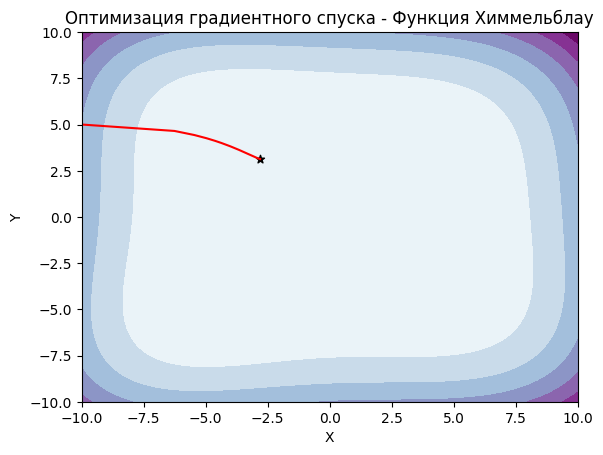

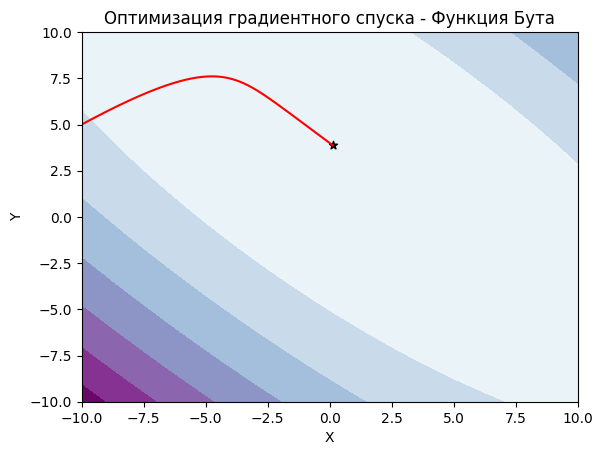

In [8]:
start_point = np.array([-10.0, 5.0])
functions = [himmelblau, booth]
functions_grad = [himmelblau_grad, booth_grad]
function_names = ['Функция Химмельблау', 'Функция Бута']

# градиентный спуск
def gradient_descent(function, grad_function, start_point, learning_rate = 0.001, max_iterations = 1000, tolerance = 1e-6):
    path = [start_point]
    x, y = start_point

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * grad
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path), function(x, y)

# визуализация
for func, func_grad, name in zip(functions, functions_grad, function_names):
    path, final_value = gradient_descent(func, func_grad, start_point)

    x = np.linspace(x_min, x_max, 400)
    y = np.linspace(y_min, y_max, 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    plt.figure()
    plt.title(f'Оптимизация градиентного спуска - {name}')
    plt.contourf(X, Y, Z, cmap = 'BuPu')
    plt.plot(path[:, 0], path[:, 1], color = 'red')
    plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

##Запрограммировать пайплайн тестирования алгоритма оптимизации

###Визуализации функции и точки оптимума

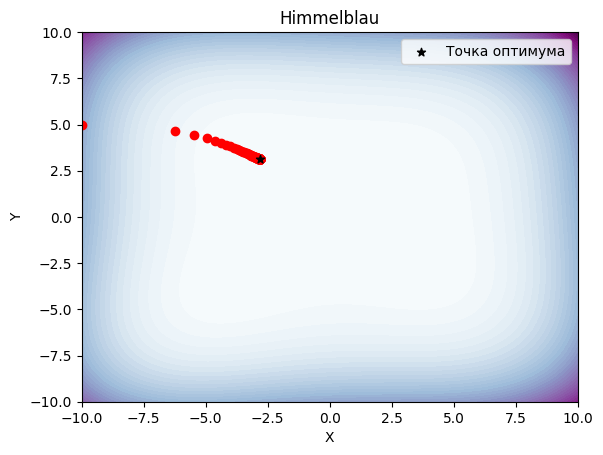

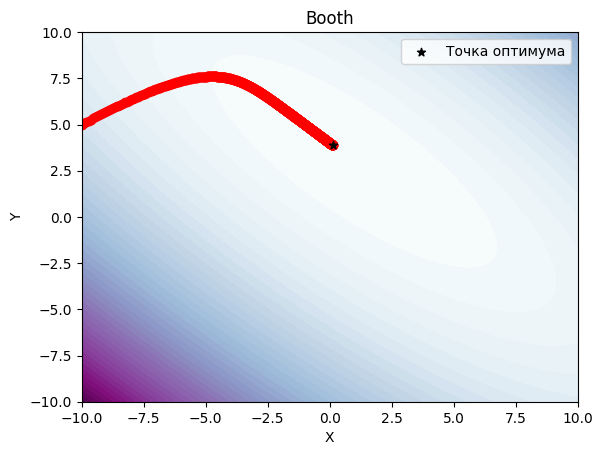

In [15]:
from matplotlib.animation import FuncAnimation

# функция построения графика визуализации и записи видео
def visualise_path(path, func, title):
    x = np.linspace(x_min, x_max, 400)
    y = np.linspace(y_min, y_max, 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig, ax = plt.subplots()
    contour = ax.contourf(X, Y, Z, cmap = 'BuPu', levels = 50)
    scatter = ax.scatter([], [], color = 'red')
    optimum = ax.scatter([], [], marker = "*", color = 'black', label = 'Точка оптимума')

    def update(frame):
        scatter.set_offsets(path[:frame, :])
        optimum.set_offsets(path[frame - 1:frame, :])

    vis = FuncAnimation(fig, update, frames = len(path), blit=False)
    vid_name = title + '.mp4'
    vis.save(vid_name, fps = 5, extra_args = ['-vcodec', 'libx264'])
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# визуализация для сферы и функции Бута
def testing_pipeline():
    learning_rate = 0.001
    max_iterations = 1000

    #start_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
    start_point = np.array([-10.0, 5.0])
    history_himmelblau, point = gradient_descent(himmelblau, himmelblau_grad, start_point, learning_rate, max_iterations)
    visualise_path(history_himmelblau, himmelblau, 'Himmelblau')

    history_booth, point = gradient_descent(booth, booth_grad, start_point, learning_rate, max_iterations)
    visualise_path(history_booth, booth, 'Booth')


testing_pipeline()

###Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков

In [18]:
# функции визуализации 3д графиков и вычисления погрешностей
def visualize_optimization_3d(history_x, history_y, history_z, function, title, error, ax):
    x = np.linspace(x_min, x_max, 100)
    y = np.linspace(y_min, y_max, 100)
    x, y = np.meshgrid(x, y)
    z = function(x, y)

    ax.plot_surface(x, y, z, cmap = 'BuPu', alpha=0.8)
    ax.scatter(history_x, history_y, history_z, color = 'red', s = 30)
    ax.scatter(history_x[-1], history_y[-1], history_z[-1], color='green', marker='s')

    # угол наклона графиков
    ax.view_init(70, -60, -45)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'{title}\nПогрешность: {error:.10f}')

def testing_pipeline(function, grad_function, learning_rate = 0.001, max_iterations = 1000, tolerance = 1e-6):
    errors = []
    num_plots = 3
    num_rows = 1
    num_cols = 3

    fig = plt.figure(figsize = (15, 20))

    for i in range(num_plots):
        start_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
        history, optimal_point = gradient_descent(function, grad_function, start_point, learning_rate, max_iterations, tolerance)

        error = np.linalg.norm(optimal_point)
        errors.append(error)

        row_idx = i // num_cols
        col_idx = i % num_cols

        ax = plt.subplot2grid((num_rows, num_cols), (row_idx, col_idx), projection='3d')
        visualize_optimization_3d([point[0] for point in history],
                                  [point[1] for point in history],
                                  [function(point[0], point[1]) for point in history],
                                  function, f'Решение {i + 1}', error, ax)

    plt.tight_layout()
    plt.show()

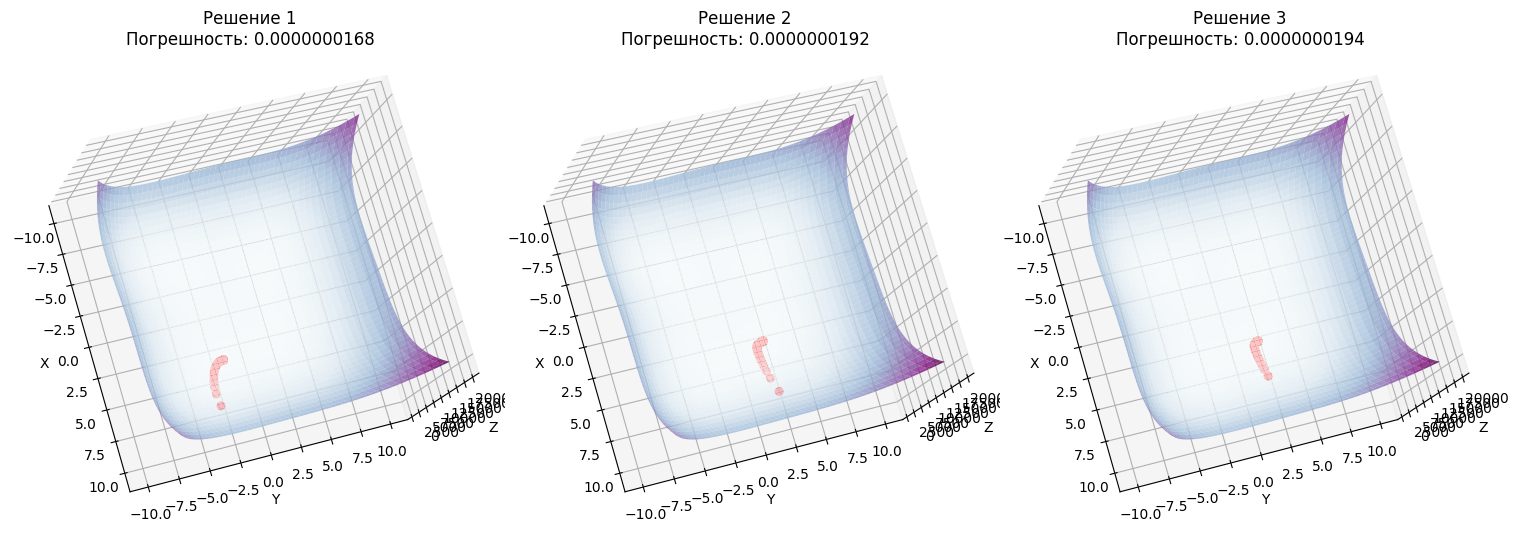

In [19]:
testing_pipeline(himmelblau, himmelblau_grad)

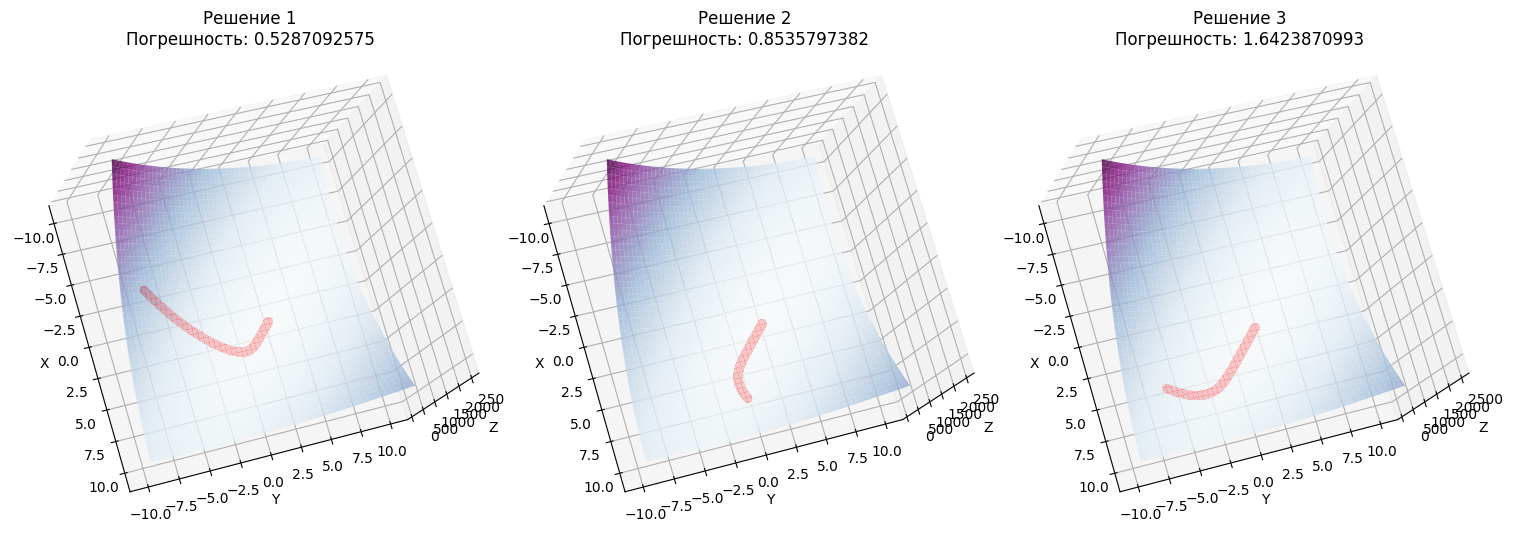

In [20]:
testing_pipeline(booth, booth_grad)

###Визуализации точки найденного решения (можно добавить анимацию на плюс балл)

In [21]:
# функция которая показывает видео .mp4 по его пути
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

Анимация для Химмельблау:

In [22]:
show_video('/content/Himmelblau.mp4')

Анимация для функции Бута:

In [23]:
show_video('/content/Booth.mp4')

##Запрограммировать метод вычисления градиента

In [27]:
# функция Химмельблау
def user_gradient_himmelblau(x, y):
    df_dx = 2 * (x**2 + y - 11) * (2*x) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 2 * (x + y**2 - 7) * (2*y)
    return df_dx, df_dy

x_val = float(input("x: "))
y_val = float(input("y: "))
user_grad = user_gradient_himmelblau(x_val, y_val)
print(f"Градиент для функции Химмельблау в точке ({x_val}, {y_val}): {user_grad}")

x: 2
y: 3
Градиент для функции Химмельблау в точке (2.0, 3.0): (-24.0, 40.0)


In [24]:
# функция Бута
def user_gradient_booth(x, y):
    df_dx = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    df_dy = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    return df_dx, df_dy

x_val = float(input("x: "))
y_val = float(input("y: "))
user_grad = user_gradient_booth(x_val, y_val)
print(f"Градиент для функции Бута в точке ({x_val}, {y_val}): {user_grad}")

x: 2
y: 3
Градиент для функции Бута в точке (2.0, 3.0): (10.0, 8.0)


###Символьное вычисление градиента (например с помощью sympy) (на доп балл)

In [28]:
import sympy as sp

x, y = sp.symbols('x y')
sympy_himmelblau = (x**2 + y - 11)**2 + (x + y**2 - 7)**2

sympy_grad = [sp.diff(sympy_himmelblau, var) for var in (x, y)]

sympy_grad_func = sp.lambdify((x, y), sympy_grad, 'numpy')

x_val = 0.0
y_val = 0.0
sympy_grad_res = sympy_grad_func(x_val, y_val)
print(f"Символьное вычисление градиента функции Химмельблау в ({x_val}, {y_val}): {sympy_grad_res}")

Символьное вычисление градиента функции Химмельблау в (0.0, 0.0): [-14.0, -22.0]


In [29]:
x, y = sp.symbols('x y')
sympy_booth = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

sympy_grad = [sp.diff(sympy_booth, var) for var in (x, y)]

sympy_grad_func = sp.lambdify((x, y), sympy_grad, 'numpy')

x_val = 1.0
y_val = 3.0
sympy_grad_res = sympy_grad_func(x_val, y_val)
print(f"Символьное вычисление градиента функции Бута в ({x_val}, {y_val}): {sympy_grad_res}")

Символьное вычисление градиента функции Бута в (1.0, 3.0): [0.0, 0.0]


###Численная аппроксимация градиента (на доп балл)

In [30]:
def approx_grad(function, x, y, epsilon=1e-10):
    df_dx = (function(x + epsilon, y) - function(x - epsilon, y)) / (2 * epsilon)
    df_dy = (function(x, y + epsilon) - function(x, y - epsilon)) / (2 * epsilon)
    return df_dx, df_dy

x_val = 0.0
y_val = 0.0
approx_grad_res = approx_grad(himmelblau, x_val, y_val)
print(f"Численная аппроксимация градиента функции Химмельблау в ({x_val}, {y_val}): {approx_grad_res}")

x_val = 1.0
y_val = 3.0
approx_grad_res = approx_grad(booth, x_val, y_val)
print(f"Численная аппроксимация градиента функции Бута в ({x_val}, {y_val}): {approx_grad_res}")

Численная аппроксимация градиента функции Химмельблау в (0.0, 0.0): (-13.999965631228406, -22.000108401698526)
Численная аппроксимация градиента функции Бута в (1.0, 3.0): (0.0, 0.0)


##Запрограммировать одну моментную модификацию и протестировать ее

In [31]:
def grad_mod1(function, grad_function, start_point, learning_rate = 0.01, momentum = 0.9, max_iterations = 1000, tolerance = 1e-6):
    path = [start_point]
    x, y = start_point
    velocity = np.zeros_like(start_point)

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        velocity = momentum * velocity + learning_rate * grad
        new_x, new_y = np.array([x, y]) - velocity
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

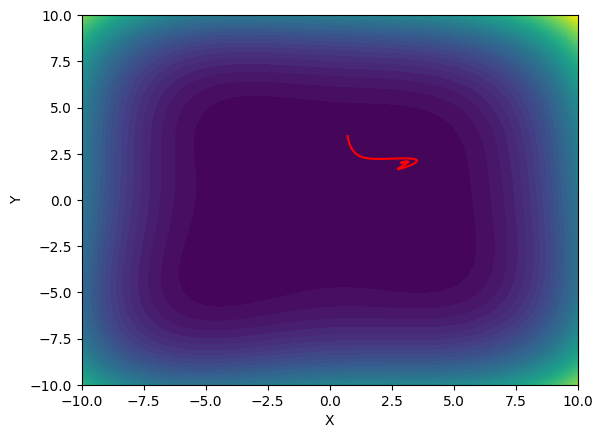

In [33]:
start_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_himmelblau_mod1 = grad_mod1(himmelblau, himmelblau_grad, start_point, learning_rate=0.001)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)
Z_himmelblau = himmelblau(X, Y)

plt.figure()
plt.contourf(X, Y, Z_himmelblau, cmap='viridis', levels=50)
plt.plot(path_himmelblau_mod1[:, 0], path_himmelblau_mod1[:, 1], color='red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

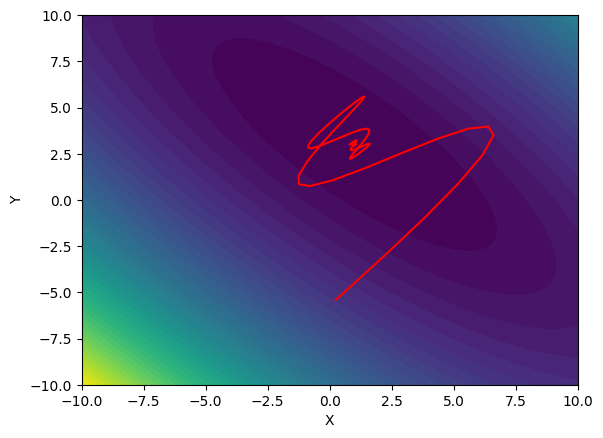

In [36]:
start_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_booth_mod1 = grad_mod1(booth, booth_grad, start_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)
Z_booth = booth(X, Y)

plt.figure()
plt.contourf(X, Y, Z_booth, cmap='viridis', levels=50)
plt.plot(path_booth_mod1[:, 0], path_booth_mod1[:, 1], color='red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##Запрограммировать одну адаптивную модификацию и протестировать ее

In [37]:
def grad_mod2(function, grad_function, start_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    path = [start_point]
    x, y = start_point
    G = np.zeros_like(start_point)

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        G += grad ** 2
        adjusted_learning_rate = learning_rate / np.sqrt(G + 1e-8)

        new_x, new_y = np.array([x, y]) - adjusted_learning_rate * grad
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

Адаптивная модификация для Химмельблау:

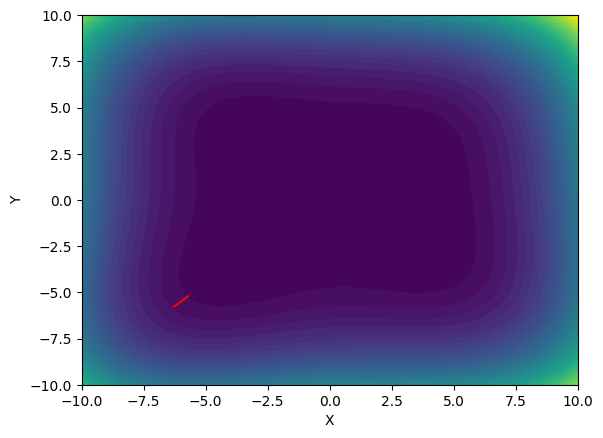

In [40]:
start_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_himmelblau_mod2 = grad_mod2(himmelblau, himmelblau_grad, start_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)
Z_himmelblau = himmelblau(X, Y)

plt.figure()
plt.contourf(X, Y, Z_himmelblau, cmap='viridis', levels=50)
plt.plot(path_himmelblau_mod2[:, 0], path_himmelblau_mod2[:, 1], color='red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Адаптивная модификация для функции Бута:

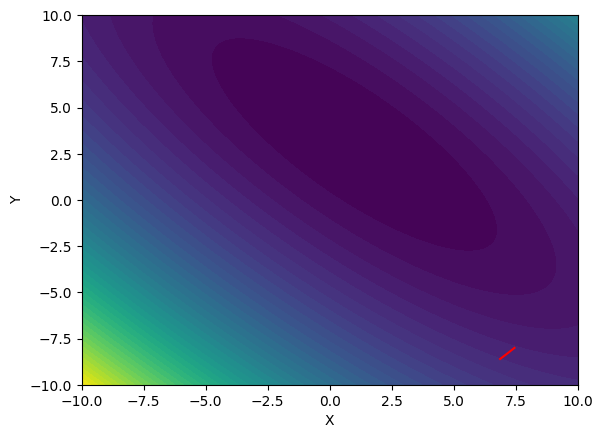

In [41]:
start_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_booth_mod2 = grad_mod2(booth, booth_grad, start_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)
Z_booth = booth(X, Y)

plt.figure()
plt.contourf(X, Y, Z_booth, cmap='viridis', levels=50)
plt.plot(path_booth_mod2[:, 0], path_booth_mod2[:, 1], color='red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их

In [42]:
def grad_mod3(function, grad_function, start_point, learning_rate = 0.01, max_iterations = 1500, tolerance = 1e-6, improvement_threshold = 0.1):
    path = [start_point]
    x, y = start_point
    learning_rate = learning_rate
    best_value = float('inf')

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * grad
        new_value = function(new_x, new_y)

        if new_value < best_value - tolerance * improvement_threshold:
            best_value = new_value
        else:
            learning_rate /= 2

        path.append((new_x, new_y))
        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

Метод эволюции темпа обучения для сферы:

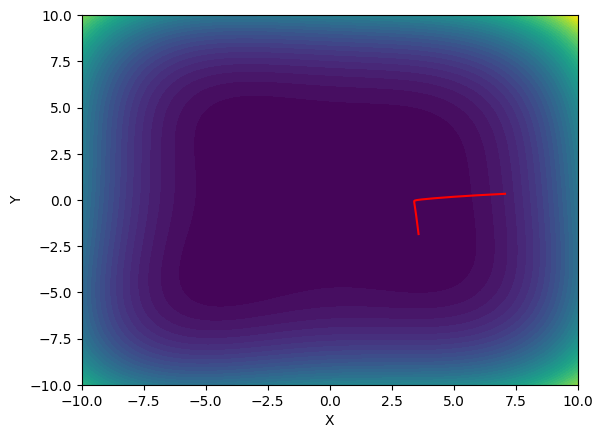

In [44]:
start_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_himmelblau_mod3 = grad_mod3(himmelblau, himmelblau_grad, start_point, learning_rate = 0.001)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)
Z_himmelblau = himmelblau(X, Y)

plt.figure()
plt.contourf(X, Y, Z_himmelblau, cmap = 'viridis', levels = 50)
plt.plot(path_himmelblau_mod3[:, 0], path_himmelblau_mod3[:, 1], color = 'red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Метод эволюции темпа обучения для функции Бута:

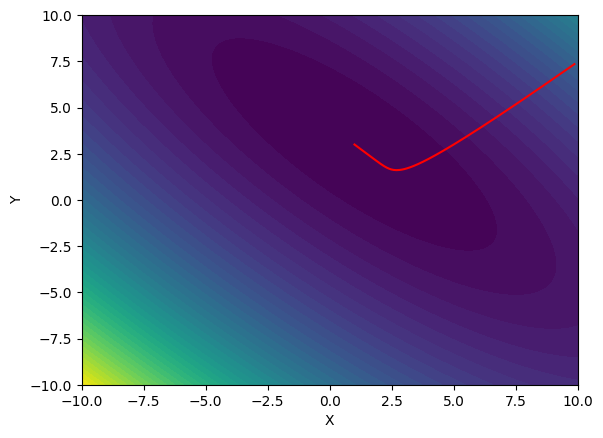

In [45]:
start_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_booth_mod3 = grad_mod3(booth, booth_grad, start_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)
Z_booth = booth(X, Y)

plt.figure()
plt.contourf(X, Y, Z_booth, cmap = 'viridis', levels = 50)
plt.plot(path_booth_mod3[:, 0], path_booth_mod3[:, 1], color = 'red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()